In [194]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns

In [195]:
mydir = '/Users/supriyajadhav/Documents/MS422-Practical-Machine-Learning/Project422/'
processed_df = pd.read_csv(mydir + 'preprocessed_train_data.csv')

/var/folders/r1/dsylm7cn0vg3015hchpddz9m0000gn/T/ipykernel_97116/3622642928.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  processed_df = pd.read_csv(mydir + 'preprocessed_train_data.csv')


In [196]:
test_df = pd.read_csv(mydir + 'preprocessed_test_data.csv')
test_df.head()

,Unnamed: 0,id,date,store_nbr,family,onpromotion,city,state,type,cluster,IS_HOLIDAY,day,month,year,week_of_day,week_of_month,week_number
0,0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,0.0,16,8,2017,3,3,33
1,1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,0.0,16,8,2017,3,3,33
2,2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,0.0,16,8,2017,3,3,33
3,3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,0.0,16,8,2017,3,3,33
4,4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,0.0,16,8,2017,3,3,33


In [197]:
# Convert 'date' to datetime format
processed_df['date'] = pd.to_datetime(processed_df['date'])

# Extract day,month and year
processed_df['day'] = processed_df['date'].dt.day

In [198]:
unique_store_family_df = processed_df[['store_nbr', 'family']].drop_duplicates()

# Reset index if you want a clean DataFrame
unique_store_family_df = unique_store_family_df.reset_index(drop=True)

# Display the resulting DataFrame
print(unique_store_family_df.head())
print(len(unique_store_family_df))

   store_nbr      family
0          1  AUTOMOTIVE
1          1   BABY CARE
2          1      BEAUTY
3          1   BEVERAGES
4          1       BOOKS
1782


In [199]:
missing_data = processed_df.isnull().sum()
print(missing_data)

Unnamed: 0             0
id                     0
date                   0
store_nbr              0
family                 0
sales                  0
onpromotion            0
city                   0
state                  0
type                   0
cluster                0
holiday_type     2746128
IS_HOLIDAY             0
oil_price         862752
month                  0
year                   0
week_of_day            0
week_of_month          0
week_number            0
day                    0
dtype: int64


In [200]:
processed_df = processed_df.drop(columns=['holiday_type','oil_price'])

### Group train data per store and family

In [201]:
# Step 1: Group by 'store_nbr' and 'family'
grouped = processed_df.groupby(['store_nbr', 'family'])

# Step 2: Sort each group by 'date' in ascending order
sorted_df = grouped.apply(lambda x: x.sort_values('date')).reset_index(drop=True)

# Optional: If you want to create a dictionary of DataFrames, one for each group
grouped_dict = {f"processed_{store}_{family}": group.sort_values('date') 
                for (store, family), group in grouped}

# Display the result
sorted_df.head()


,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,IS_HOLIDAY,month,year,week_of_day,week_of_month,week_number,day
0,0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,1.0,1,2013,2,1,1,1
1,1782,1782,2013-01-02,1,AUTOMOTIVE,2.0,0,Quito,Pichincha,D,13,0.0,1,2013,3,1,1,2
2,3564,3564,2013-01-03,1,AUTOMOTIVE,3.0,0,Quito,Pichincha,D,13,0.0,1,2013,4,1,1,3
3,5346,5346,2013-01-04,1,AUTOMOTIVE,3.0,0,Quito,Pichincha,D,13,0.0,1,2013,5,1,1,4
4,7128,7128,2013-01-05,1,AUTOMOTIVE,5.0,0,Quito,Pichincha,D,13,1.0,1,2013,6,1,1,5


### Group test data per store and family

In [202]:
# Step 1: Group by 'store_nbr' and 'family'
grouped_test = test_df.groupby(['store_nbr', 'family'])

# Step 2: Sort each group by 'date' in ascending order
sorted_test_df = grouped_test.apply(lambda x: x.sort_values('date')).reset_index(drop=True)

# Optional: If you want to create a dictionary of DataFrames, one for each group
grouped_test_dict = {f"test_{store}_{family}": group.sort_values('date') 
                for (store, family), group in grouped_test}

# Display the result
sorted_test_df.head()

/var/folders/r1/dsylm7cn0vg3015hchpddz9m0000gn/T/ipykernel_97116/3294503807.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sorted_test_df = grouped_test.apply(lambda x: x.sort_values('date')).reset_index(drop=True)


,Unnamed: 0,id,date,store_nbr,family,onpromotion,city,state,type,cluster,IS_HOLIDAY,day,month,year,week_of_day,week_of_month,week_number
0,0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,0.0,16,8,2017,3,3,33
1,1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,0.0,16,8,2017,3,3,33
2,2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,0.0,16,8,2017,3,3,33
3,3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,0.0,16,8,2017,3,3,33
4,4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,0.0,16,8,2017,3,3,33


In [203]:
store = '1'
family = 'BEAUTY'

In [204]:
processed_1_AUTOMOTIVE_df = grouped_dict[f'processed_{store}_{family}']
test_1_AUTOMOTIVE_df = grouped_test_dict[f'test_{store}_{family}']

In [205]:
tt_df = pd.concat([processed_1_AUTOMOTIVE_df,test_1_AUTOMOTIVE_df])

### add extra temporal features for train and test data

In [206]:

# Create cyclical features
tt_df['month_sin'] = np.sin(2 * np.pi * tt_df['month'] / 12)
tt_df['month_cos'] = np.cos(2 * np.pi * tt_df['month'] / 12)
tt_df['weekday_sin'] = np.sin(2 * np.pi * tt_df['week_of_day'] / 7)
tt_df['weekday_cos'] = np.cos(2 * np.pi * tt_df['week_of_day'] / 7)

# Optionally, create lag features and rolling statistics
# processed_1_AUTOMOTIVE_df['sales_lag_1'] = processed_1_AUTOMOTIVE_df['sales'].shift(1)
# processed_1_AUTOMOTIVE_df['sales_rolling_mean_7'] = processed_1_AUTOMOTIVE_df['sales'].rolling(window=7).mean()

# Drop rows with NaN values if needed
tt_df = tt_df.dropna(subset=[col for col in tt_df.columns if col != 'sales'])

In [207]:
# drop unnecessary columns
tt_df = tt_df.drop([
    'Unnamed: 0',
    'date',
    'id',
    'city',
    'state',
    'store_nbr',
    'family',
    'type' ], 
    axis = 1)

In [208]:
print(tt_df.columns)

Index(['sales', 'onpromotion', 'cluster', 'IS_HOLIDAY', 'month', 'year',
       'week_of_day', 'week_of_month', 'week_number', 'day', 'month_sin',
       'month_cos', 'weekday_sin', 'weekday_cos'],
      dtype='object')


In [209]:
tt_df = tt_df.astype('float64')
tt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 2 to 26732
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sales          1688 non-null   float64
 1   onpromotion    1704 non-null   float64
 2   cluster        1704 non-null   float64
 3   IS_HOLIDAY     1704 non-null   float64
 4   month          1704 non-null   float64
 5   year           1704 non-null   float64
 6   week_of_day    1704 non-null   float64
 7   week_of_month  1704 non-null   float64
 8   week_number    1704 non-null   float64
 9   day            1704 non-null   float64
 10  month_sin      1704 non-null   float64
 11  month_cos      1704 non-null   float64
 12  weekday_sin    1704 non-null   float64
 13  weekday_cos    1704 non-null   float64
dtypes: float64(14)
memory usage: 199.7 KB


In [210]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Selecting features
features = ['onpromotion', 'cluster', 'IS_HOLIDAY', 'month', 'year',
       'week_of_day', 'week_of_month', 'week_number', 'day', 'month_sin',
       'month_cos', 'weekday_sin', 'weekday_cos'
       #, 'sales_lag_1',
       #'sales_rolling_mean_7'
       ]
target = 'sales'

# Feature scaling
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

# Get the remaining records for the training set
feature_df = pd.DataFrame(feature_scaler.fit_transform(tt_df[features]))
target_df = pd.DataFrame(target_scaler.fit_transform(tt_df[target].dropna().values.reshape(-1,1)))

# split train and test
X = feature_df.iloc[:-16]
y = target_df

sep_test_df = feature_df.iloc[-16:]

print(X.shape)
print(y.shape)
print(sep_test_df.shape)

# Splitting data into training and testing sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size=0.2, shuffle=False)

# X_train_scaled = feature_scaler.fit_transform(X_train)
# X_test_scaled = feature_scaler.fit_transform(X_test)
# y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1,1))
# y_test_scaled = target_scaler.fit_transform(y_test.values.reshape(-1,1))


(1688, 13)
(1688, 1)
(16, 13)


In [211]:
print(X_train_scaled.shape)

(1350, 13)


In [212]:
print(y_train_scaled.shape)

(1350, 1)


In [213]:
print(X_test_scaled.shape)

(338, 13)


In [214]:
print(y_test_scaled.shape)

(338, 1)


## LSTM Model

In [215]:
import tensorflow as tf

def rmsle(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float64)
    y_pred = tf.cast(y_pred, tf.float64)
    return tf.sqrt(tf.reduce_mean(tf.square(tf.math.log(y_pred + 1) - tf.math.log(y_true + 1))))


In [216]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Reshape data to fit LSTM input shape (num_samples, timesteps, num_features)
timesteps = 1  # You need to define this based on your data and model requirements
X_train_reshaped = X_train_scaled.values.reshape((X_train_scaled.values.shape[0], timesteps, X_train_scaled.values.shape[1]))
X_test_reshaped = X_test_scaled.values.reshape((X_test_scaled.values.shape[0], timesteps, X_test_scaled.values.shape[1]))

# Building the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=60, return_sequences=True, input_shape=(timesteps, X_train_reshaped.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=60, return_sequences=False))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer='adam', loss=rmsle)
#lstm_model.summary()

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the LSTM model
lstm_model.fit(X_train_reshaped, y_train_scaled, epochs=30, batch_size=64, 
               validation_data=(X_test_reshaped, y_test_scaled),
               callbacks=[early_stopping])


Epoch 1/30


/Users/supriyajadhav/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1700 - val_loss: 0.1447
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1219 - val_loss: 0.1575
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1157 - val_loss: 0.1448
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1170 - val_loss: 0.1429
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1153 - val_loss: 0.1406
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1149 - val_loss: 0.1344
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1120 - val_loss: 0.1345
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1126 - val_loss: 0.1288
Epoch 9/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1156 - val_loss: 0.1313
Epoch 10/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1105 - val_loss: 0.1309
Epoch 11/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1127 - val_loss: 0.1315


In [217]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dropout, Dense
# from scikeras.wrappers import KerasRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the function to create the LSTM model
# def create_lstm_model(units=50, dropout_rate=0.5, optimizer='adam'):
#     model = Sequential()
#     model.add(LSTM(units=units, return_sequences=True, input_shape=(timesteps, X_train_reshaped.shape[2])))
#     model.add(Dropout(dropout_rate))
#     model.add(LSTM(units=units, return_sequences=False))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(units=1))
#     model.compile(optimizer=optimizer, loss=rmsle)
#     return model

# # Define the grid of hyperparameters to search, using lambda functions to pass parameters
# param_grid = {
#     'build_fn': [
#         lambda: create_lstm_model(units=50, dropout_rate=0.2, optimizer='adam'),
#         lambda: create_lstm_model(units=50, dropout_rate=0.5, optimizer='adam'),
#         lambda: create_lstm_model(units=50, dropout_rate=0.3, optimizer='adam'),
#         lambda: create_lstm_model(units=60, dropout_rate=0.2, optimizer='adam'),
#         lambda: create_lstm_model(units=60, dropout_rate=0.5, optimizer='adam'),
#         lambda: create_lstm_model(units=60, dropout_rate=0.3, optimizer='adam'),
#         lambda: create_lstm_model(units=80, dropout_rate=0.2, optimizer='adam'),
#         lambda: create_lstm_model(units=80, dropout_rate=0.3, optimizer='adam'),
#         lambda: create_lstm_model(units=80, dropout_rate=0.5, optimizer='adam'),
#         lambda: create_lstm_model(units=50, dropout_rate=0.2, optimizer='rmsprop'),
#         lambda: create_lstm_model(units=50, dropout_rate=0.5, optimizer='rmsprop'),
#         lambda: create_lstm_model(units=50, dropout_rate=0.3, optimizer='rmsprop'),
#         lambda: create_lstm_model(units=60, dropout_rate=0.2, optimizer='rmsprop'),
#         lambda: create_lstm_model(units=60, dropout_rate=0.5, optimizer='rmsprop'),
#         lambda: create_lstm_model(units=60, dropout_rate=0.3, optimizer='rmsprop'),
#         lambda: create_lstm_model(units=80, dropout_rate=0.2, optimizer='rmsprop'),
#         lambda: create_lstm_model(units=80, dropout_rate=0.3, optimizer='rmsprop'),
#         lambda: create_lstm_model(units=80, dropout_rate=0.5, optimizer='rmsprop')
#     ],
#     'batch_size': [16, 32, 64],  # Batch size
#     'epochs': [30, 50, 100],  # Number of epochs
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=KerasRegressor(build_fn=create_lstm_model, verbose=0), param_grid=param_grid, cv=3, n_jobs=-1)

# # Perform the grid search
# grid_search_result = grid_search.fit(X_train_reshaped, y_train_scaled)

# # Print the best parameters and best score
# print(f"Best Parameters: {grid_search_result.best_params_}")
# print(f"Best Score: {grid_search_result.best_score_}")


In [218]:
# Predictions
lstm_predictions = lstm_model.predict(X_test_reshaped)

# Ensure both predictions and actual values are of type float64
y_test_scaled = y_test_scaled.values.reshape(-1, 1).astype('float64')
lstm_predictions_scaled = lstm_predictions.astype('float64')

# Calculate RMSLE
lstm_rmsle_val = rmsle(y_test_scaled, lstm_predictions_scaled)

print(f"LSTM RMSLE VAL: {lstm_rmsle_val.numpy()}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
LSTM RMSLE VAL: 0.12931795311454228


In [219]:
val_results_df = pd.DataFrame({
    'Actual': y_test_scaled.flatten(),  # Flatten to ensure the shape is 1D
    'Predicted': lstm_predictions_scaled.flatten()
})

# Display the first few rows of the DataFrame
print(val_results_df.head())

   Actual  Predicted
0    0.25   0.155622
1    0.50   0.193856
2    0.25   0.224419
3    0.25   0.234647
4    0.25   0.228956


In [220]:
lstm_predictions_scaled.shape

(338, 1)

In [221]:
y_test_scaled.shape

(338, 1)

In [222]:
y_test_actual = target_scaler.inverse_transform(y_test_scaled).astype('float64')
lstm_predictions_actual = target_scaler.inverse_transform(lstm_predictions_scaled).astype('float64')

In [223]:
val_results_actual_df = pd.DataFrame({
    'Actual': y_test_actual.flatten(),  # Flatten to ensure the shape is 1D
    'Predicted': lstm_predictions_actual.flatten()
})

# Display the first few rows of the DataFrame
print(val_results_actual_df.head())

   Actual  Predicted
0     3.0   1.867466
1     6.0   2.326275
2     3.0   2.693025
3     3.0   2.815768
4     3.0   2.747469


In [224]:
lstm_rmsle_val_actual = rmsle(y_test_actual, lstm_predictions_actual)
lstm_rmsle_val_actual

<tf.Tensor: shape=(), dtype=float64, numpy=0.5034758030751795>

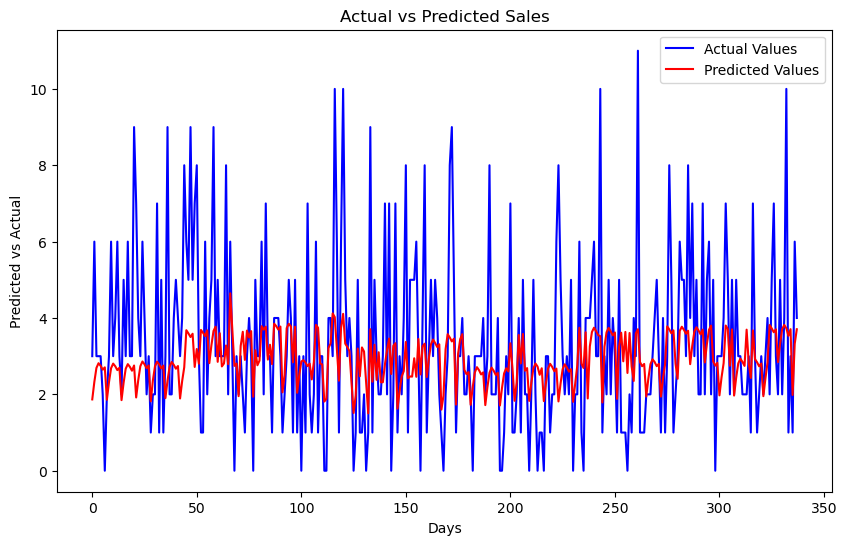

In [225]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Values', color='b')
plt.plot(lstm_predictions_actual, label='Predicted Values', color='r')
plt.xlabel('Days')
plt.ylabel('Predicted vs Actual')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()


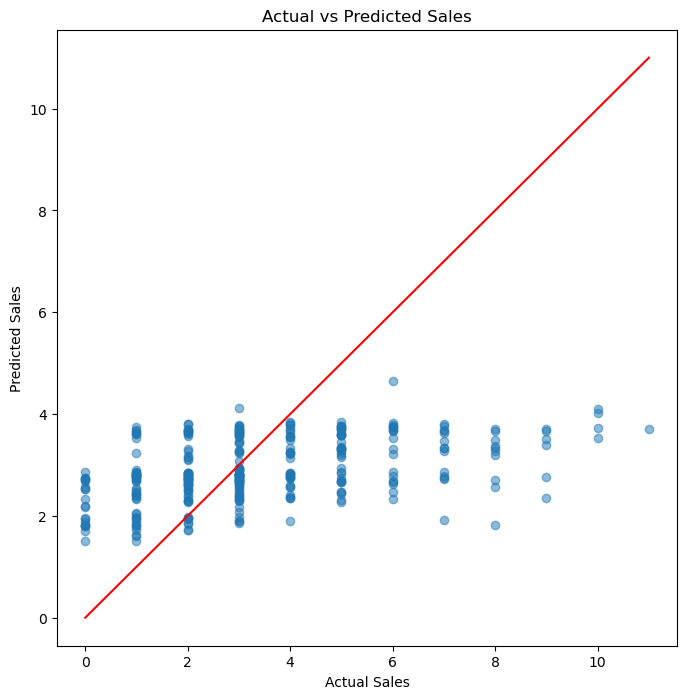

In [226]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test_actual, lstm_predictions_actual, alpha=0.5)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], color='red')  # Diagonal line
plt.show()


## predcition on test.csv

In [227]:
# predictions_list=[]

In [228]:
# test_df = pd.read_csv(mydir + 'preprocessed_test_data.csv')
# test_df.head()

In [229]:
# # Step 1: Group by 'store_nbr' and 'family'
# grouped_test = test_df.groupby(['store_nbr', 'family'])

# # Step 2: Sort each group by 'date' in ascending order
# sorted_test_df = grouped_test.apply(lambda x: x.sort_values('date')).reset_index(drop=True)

# # Optional: If you want to create a dictionary of DataFrames, one for each group
# grouped_test_dict = {f"test_{store}_{family}": group.sort_values('date') 
#                 for (store, family), group in grouped_test}

# # Display the result
# sorted_test_df.head()


In [230]:
# test_1_AUTOMOTIVE_df = grouped_test_dict['test_1_BEVERAGES']
# test_1_AUTOMOTIVE_df.head()

In [231]:
# test_1_AUTOMOTIVE_df.columns

In [232]:
# test_1_AUTOMOTIVE_df.shape

In [233]:
# # Create cyclical features
# test_1_AUTOMOTIVE_df['month_sin'] = np.sin(2 * np.pi * test_1_AUTOMOTIVE_df['month'] / 12)
# test_1_AUTOMOTIVE_df['month_cos'] = np.cos(2 * np.pi * test_1_AUTOMOTIVE_df['month'] / 12)
# test_1_AUTOMOTIVE_df['weekday_sin'] = np.sin(2 * np.pi * test_1_AUTOMOTIVE_df['week_of_day'] / 7)
# test_1_AUTOMOTIVE_df['weekday_cos'] = np.cos(2 * np.pi * test_1_AUTOMOTIVE_df['week_of_day'] / 7)

# # Optionally, create lag features and rolling statistics
# # processed_1_AUTOMOTIVE_df['sales_lag_1'] = processed_1_AUTOMOTIVE_df['sales'].shift(1)
# # processed_1_AUTOMOTIVE_df['sales_rolling_mean_7'] = processed_1_AUTOMOTIVE_df['sales'].rolling(window=7).mean()

# # Drop rows with NaN values if needed
# test_1_AUTOMOTIVE_df = test_1_AUTOMOTIVE_df.dropna()

# test_1_AUTOMOTIVE_df.shape

In [234]:
# test_1_AUTOMOTIVE_df_cp = test_1_AUTOMOTIVE_df.copy()

In [235]:
# # drop unnecessary columns 
# test_1_AUTOMOTIVE_df_cp = test_1_AUTOMOTIVE_df_cp.drop([
#     'Unnamed: 0',
#     'date',
#     'id',
#     'city',
#     'state',
#    'store_nbr',
#      'family',
#        'type' ], 
#        axis = 1)

In [236]:
# test_1_AUTOMOTIVE_df_cp.columns

In [237]:
# test_1_AUTOMOTIVE_df_cp_scaled = feature_scaler.fit_transform(test_1_AUTOMOTIVE_df_cp)

In [238]:
test_reshaped = sep_test_df.values.reshape((sep_test_df.shape[0], 
                                    timesteps, 
                                    sep_test_df.shape[1]))

# Make predictions using the LSTM model
lstm_predictions_test_normalised = lstm_model.predict(test_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [239]:
lstm_predictions_test_normalised

array([[0.39193565],
       [0.31047216],
       [0.3021739 ],
       [0.30863228],
       [0.23622137],
       [0.27633157],
       [0.23529121],
       [0.3169624 ],
       [0.23858562],
       [0.2299155 ],
       [0.30775535],
       [0.23519385],
       [0.2752157 ],
       [0.30648527],
       [0.24412653],
       [0.30797938]], dtype=float32)

In [240]:
lstm_predictions_test_normalised_reshaped = lstm_predictions_test_normalised.astype('float64')
lstm_predictions_test_actual = target_scaler.inverse_transform(lstm_predictions_test_normalised_reshaped).astype('float64')

In [241]:
lstm_predictions_test_actual

array([[4.70322776],
       [3.72566593],
       [3.62608695],
       [3.70358741],
       [2.83465648],
       [3.31597888],
       [2.82349455],
       [3.80354869],
       [2.86302745],
       [2.758986  ],
       [3.69306421],
       [2.82232618],
       [3.30258822],
       [3.67782319],
       [2.92951834],
       [3.6957525 ]])

In [242]:
predictions_df = pd.DataFrame({
        'id': test_1_AUTOMOTIVE_df['id'],
        'store_nbr': store,
        'family': family,
        'date': test_1_AUTOMOTIVE_df['date'],  # Or any other identifier column you have
        'predictions': lstm_predictions_test_actual.flatten()  # Ensure predictions is 1D
    })

In [243]:
print(predictions_df)

            id store_nbr  family        date  predictions
2      3000890         1  BEAUTY  2017-08-16     4.703228
1784   3002672         1  BEAUTY  2017-08-17     3.725666
3566   3004454         1  BEAUTY  2017-08-18     3.626087
5348   3006236         1  BEAUTY  2017-08-19     3.703587
7130   3008018         1  BEAUTY  2017-08-20     2.834656
8912   3009800         1  BEAUTY  2017-08-21     3.315979
10694  3011582         1  BEAUTY  2017-08-22     2.823495
12476  3013364         1  BEAUTY  2017-08-23     3.803549
14258  3015146         1  BEAUTY  2017-08-24     2.863027
16040  3016928         1  BEAUTY  2017-08-25     2.758986
17822  3018710         1  BEAUTY  2017-08-26     3.693064
19604  3020492         1  BEAUTY  2017-08-27     2.822326
21386  3022274         1  BEAUTY  2017-08-28     3.302588
23168  3024056         1  BEAUTY  2017-08-29     3.677823
24950  3025838         1  BEAUTY  2017-08-30     2.929518
26732  3027620         1  BEAUTY  2017-08-31     3.695753
